# FINAL ASSIGNMENT
Global Consumer Intelligence course

- Student: Nguyen Minh Xuan  
- University: HUST


## 1.Introduction
**Goal:**
This project aims to:
- Provide a comprehensive analysis of the given dataset, including:  Exploratory Data Analysis (EDA)
- Define specific business problems that can be addressed through data-driven insights
- Building suitable Machine learning models to achieve data-driven insights
- **Dataset:**
The dataset represents employee information from a fictional pharmaceutical/healthcare company, containing info like Job positions, Stress level, incentive attributes, etc. A CSV file with data on approximately 1,500 employees is available.
***Download the dataset here:***

https://drive.google.com/drive/folders/1Quzvp6OwJNX_tV98c4dJgBNULO3sCwNo?usp=drive_link


---

## 2.EDA & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Download the dataset through above ggdrive link , then upload to this notebook to import successfully

### 2.1. Import dataset and take a brief look

In [3]:
df= pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  PerformanceIndex          1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [5]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,PerformanceIndex,JobInvolvement,JobLevel,JobSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.895238,9.236735,2.910204,1.0,1022.185034,2.721769,65.891156,2.729932,2.074830,2.728571,...,2.824490,6922.257143,2.499320,2.500000,0.596599,0.293878,0.252381,0.551020,2.104082,2023.200000
std,9.151321,8.129551,1.025259,0.0,602.769132,1.093082,20.329428,0.711561,1.109943,1.102846,...,1.229521,1977.100821,0.883052,1.131124,0.490747,0.455692,0.434526,0.497559,0.949750,0.400136
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,1329.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
25%,30.000000,2.000000,2.000000,1.0,486.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,5542.250000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
50%,36.000000,7.000000,3.000000,1.0,1018.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,6814.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2023.000000
75%,43.000000,14.000000,4.000000,1.0,1554.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,8264.750000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2023.000000
max,60.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,5.000000,12612.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2024.000000


### 2.2. Exploratory Data Analysis - EDA



To understand the structure and type of data in categorical columns, identify 'object' type columns and then display their unique values and the count of unique values.



In [6]:
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    n_unique = df[col].nunique()
    unique_vals = df[col].unique()
    print(f"Col '{col}' has {n_unique} Unique count  | Values: {unique_vals}")

Col 'Attrition' has 2 Unique count  | Values: ['Yes' 'No']
Col 'BusinessTravel' has 3 Unique count  | Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Col 'Department' has 3 Unique count  | Values: ['Sales' 'Research & Development' 'Human Resources']
Col 'EducationField' has 6 Unique count  | Values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Col 'Gender' has 2 Unique count  | Values: ['Female' 'Male']
Col 'JobRole' has 9 Unique count  | Values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Col 'MaritalStatus' has 3 Unique count  | Values: ['Single' 'Married' 'Divorced']
Col 'Over18' has 1 Unique count  | Values: ['Y']
Col 'HowToEmploy' has 6 Unique count  | Values: ['agent_B' 'intern' 'agent_C' 'agent_A' 'direct_recruiting'
 'New_graduate_recruitment']


In [7]:
num_cols = df.select_dtypes(include=['int64']).columns
for col in num_cols:
    n_unique = df[col].nunique()
    unique_vals = df[col].unique()
    if(n_unique < 20):
        print(f"Col '{col}' has {n_unique} Unique count  | Values: {unique_vals}")
    else:
        print(f"Col '{col}' has {n_unique} Unique count")

Col 'Age' has 43 Unique count
Col 'DistanceFromHome' has 29 Unique count
Col 'Education' has 5 Unique count  | Values: [2 1 4 3 5]
Col 'EmployeeCount' has 1 Unique count  | Values: [1]
Col 'EmployeeNumber' has 1442 Unique count
Col 'EnvironmentSatisfaction' has 4 Unique count  | Values: [2 3 4 1]
Col 'PerformanceIndex' has 71 Unique count
Col 'JobInvolvement' has 4 Unique count  | Values: [3 2 4 1]
Col 'JobLevel' has 5 Unique count  | Values: [2 1 3 4 5]
Col 'JobSatisfaction' has 4 Unique count  | Values: [4 2 3 1]
Col 'MonthlyAchievement' has 1427 Unique count
Col 'NumCompaniesWorked' has 10 Unique count  | Values: [8 1 6 9 0 4 5 2 7 3]
Col 'OverTime' has 55 Unique count
Col 'PerformanceRating' has 4 Unique count  | Values: [1 4 3 2]
Col 'RelationshipSatisfaction' has 4 Unique count  | Values: [1 4 2 3]
Col 'StandardHours' has 1 Unique count  | Values: [40]
Col 'StockOptionLevel' has 4 Unique count  | Values: [0 1 3 2]
Col 'TotalWorkingYears' has 40 Unique count
Col 'TrainingTimesLast

In [8]:
# Col 'Over18' has only 1 value (Y) so all the employees are over 18, EmployeeCount have only value 1, dont need to take that col into consideration -> drop col
df = df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber'], axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'PerformanceIndex', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyAchievement',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'HowToEmploy', 'Incentive', 'RemoteWork',
       'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility',
       'ExternalFacility', 'ExtendedLeave', 'FlexibleWork',
       'StressSelfReported', 'Year'],
      dtype='object')

Check duplicates


In [11]:
print(f"Number of rows before checking for duplicates: {len(df)}")
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows. Removing")
    df.drop_duplicates(inplace=True)
    print(f"Number of rows after removing duplicates: {len(df)}")
else:
    print("No duplicate rows found")

Number of rows before checking for duplicates: 1470
No duplicate rows found



--- Age ---
count: 1470
mean: 36.89523809523809
median: 36.0
std: 9.151320983504831
min: 18.0
25%: 30.0
75%: 43.0
max: 60.0
skew: 0.4203724018269571


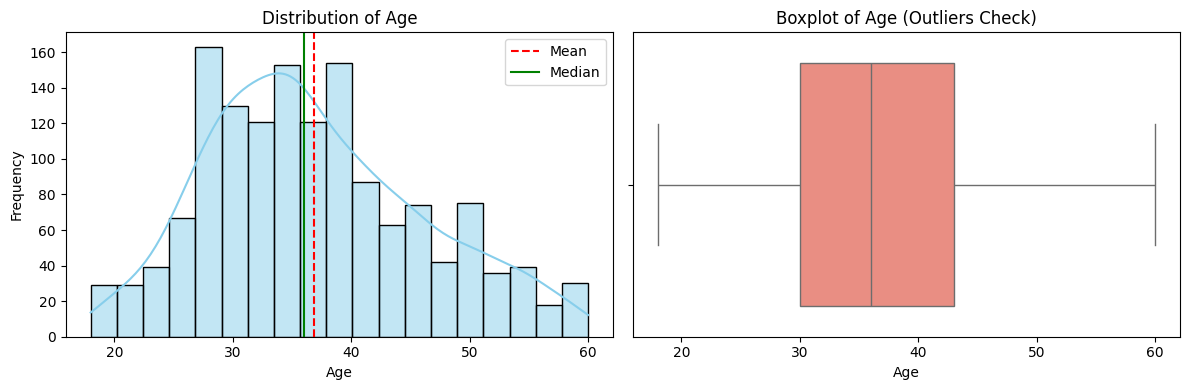


--- MonthlyIncome ---
count: 1470
mean: 6922.257142857143
median: 6814.5
std: 1977.1008205782282
min: 1329.0
25%: 5542.25
75%: 8264.75
max: 12612.0
skew: 0.1316022140131429


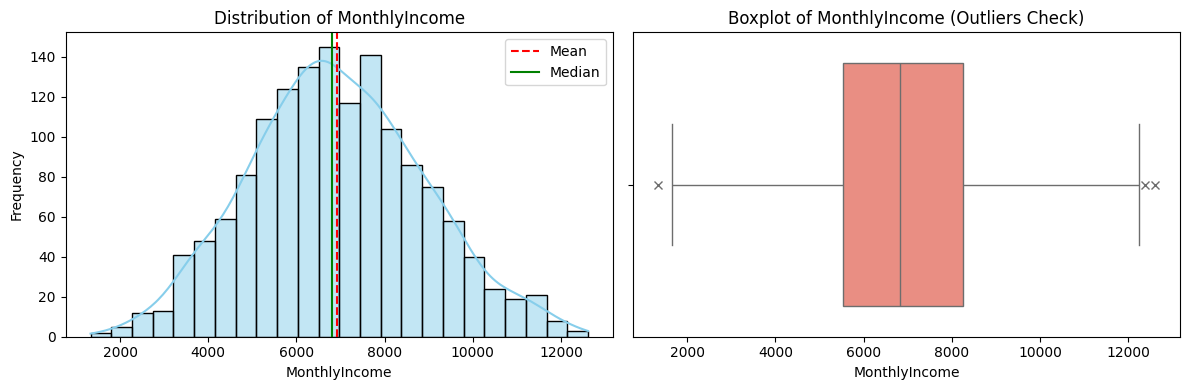


--- TotalWorkingYears ---
count: 1470
mean: 11.25374149659864
median: 10.0
std: 7.754326595793679
min: 0.0
25%: 6.0
75%: 15.0
max: 40.0
skew: 1.1312512462173883


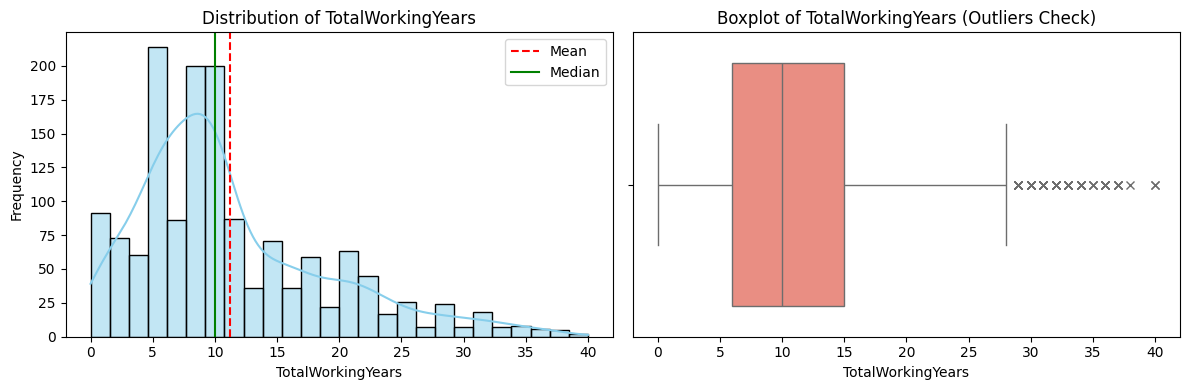


--- YearsAtCompany ---
count: 1470
mean: 7.0081632653061225
median: 5.0
std: 6.11050396507185
min: 0.0
25%: 3.0
75%: 9.0
max: 40.0
skew: 1.765613130632913


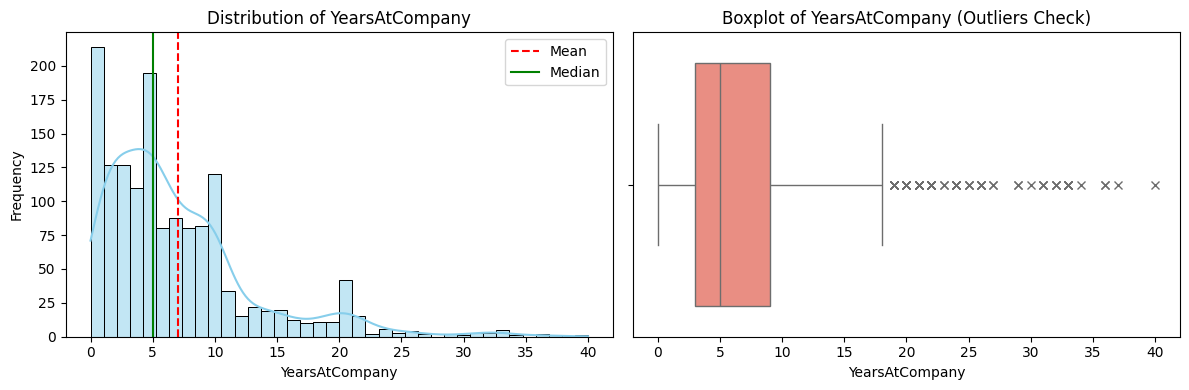


--- DistanceFromHome ---
count: 1470
mean: 9.236734693877551
median: 7.0
std: 8.129550778829993
min: 1.0
25%: 2.0
75%: 14.0
max: 29.0
skew: 0.9487854501783304


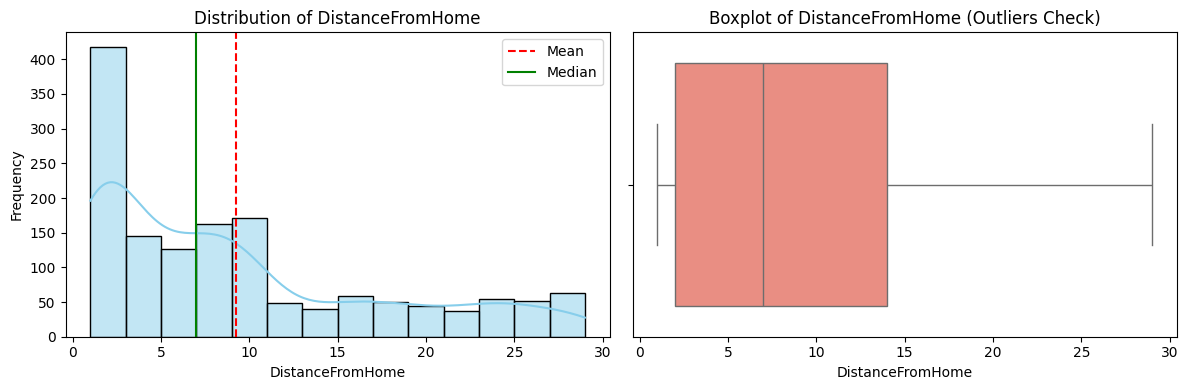

In [9]:
# Univariate Analysis
cols_to_analyze = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']

def summary_stats(series):
    return {
        'count': int(series.count()),
        'mean': float(series.mean()),
        'median': float(series.median()),
        'std': float(series.std()),
        'min': float(series.min()),
        '25%': float(series.quantile(0.25)),
        '75%': float(series.quantile(0.75)),
        'max': float(series.max()),
        'skew': float(series.skew())
    }
for col in cols_to_analyze:
    s = df[col]
    stats = summary_stats(s)
    print(f"\n--- {col} ---")
    for k,v in stats.items():
        print(f"{k}: {v}")
    bins = int(max(10, min(60, np.sqrt(len(s)))))
    # Graphing : 1 row,2 col (Left: Histogram, Right: Boxplot)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Left: Histogram + KDE
    sns.histplot(s, kde=True, ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_title(f'Distribution of {col}')
    ax1.set_ylabel('Frequency')

    # Mean and Median line
    ax1.axvline(stats['mean'], color='red', linestyle='--', label='Mean')
    ax1.axvline(stats['median'], color='green', linestyle='-', label='Median')
    ax1.legend()

    # Right: Boxplot
    sns.boxplot(x=s, ax=ax2, color='salmon', flierprops={"marker": "x"})
    ax2.set_title(f'Boxplot of {col} (Outliers Check)')
    ax2.set_xlabel(col)

    plt.tight_layout()
    plt.show()
    plt.close(fig)


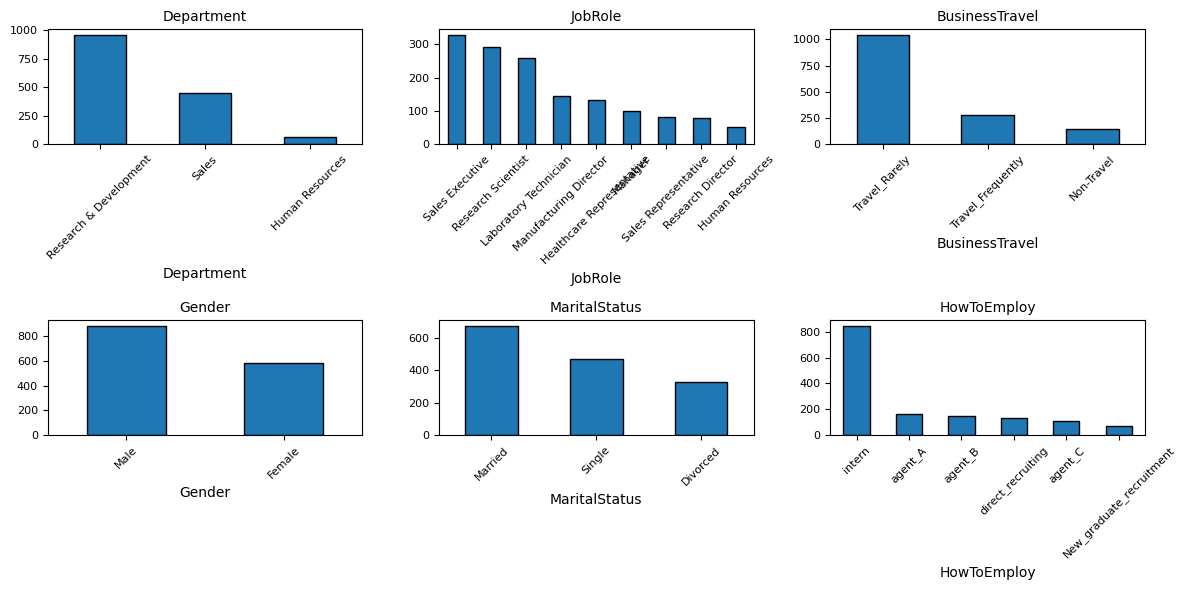

In [12]:
categorical_cols = [
    'Department', 'JobRole', 'BusinessTravel',
    'Gender', 'MaritalStatus', 'HowToEmploy'
]

cols_per_row = 3
num_plots = len(categorical_cols)
num_rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 4, num_rows * 3))
axes = axes.flatten()

# Plotting multiples graphs for categories
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    df[col].value_counts().plot(kind='bar', edgecolor='black', ax=ax)
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)


plt.tight_layout()
plt.show()


**Bivariate analysis**

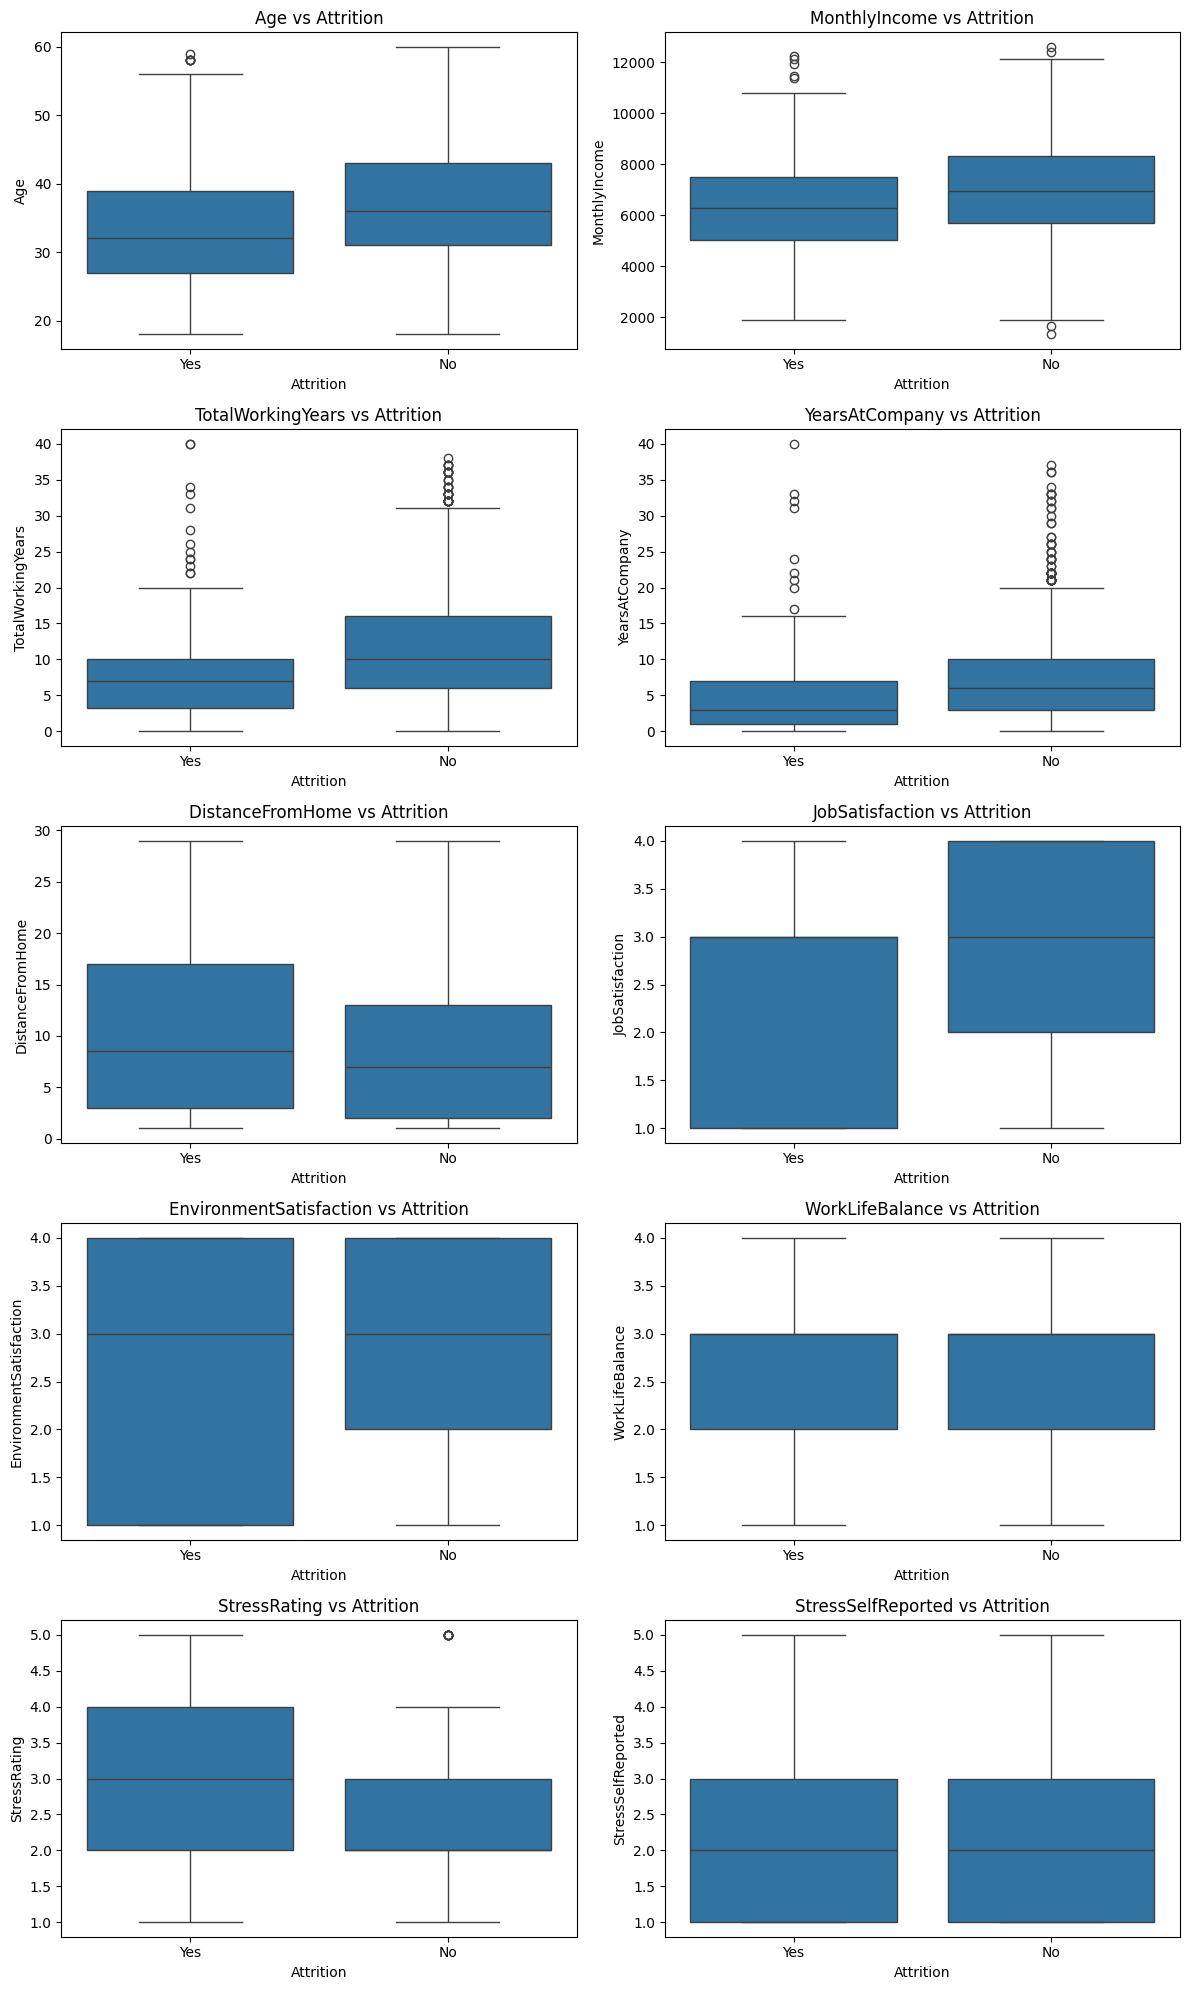

In [13]:
# List of quantitative variables
num_vars = [
    'Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome',
    'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance',
    'StressRating', 'StressSelfReported'
]

rows = 5
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
axes = axes.flatten()

for i, col in enumerate(num_vars):
    # Boxplot: X axis - Attrition, Y - variable
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition')

plt.tight_layout()
plt.show()

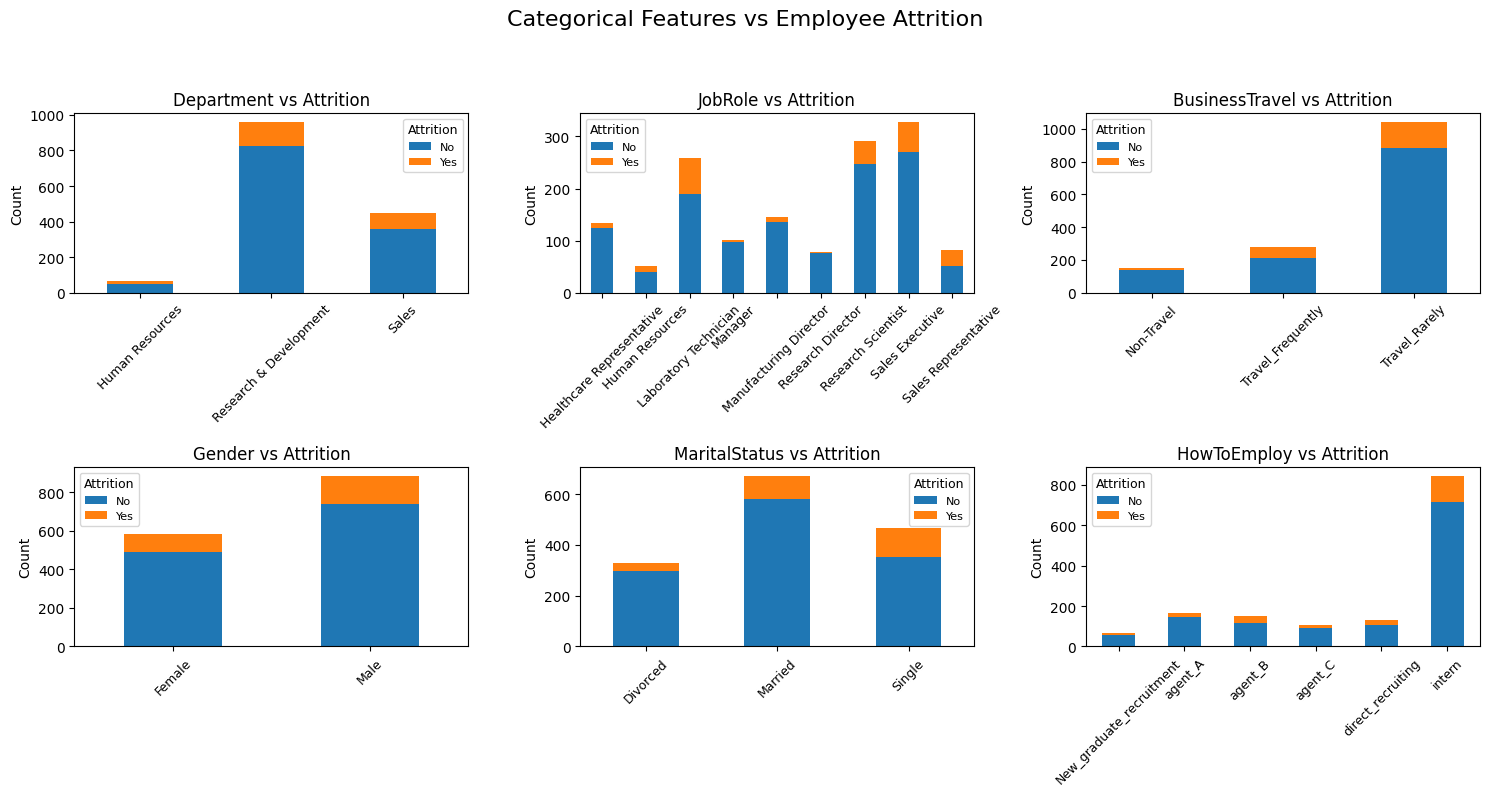

In [14]:
cat_cols = [ 'Department', 'JobRole', 'BusinessTravel',
            'Gender', 'MaritalStatus', 'HowToEmploy']

cols_per_row = 3
num_plots = len(cat_cols)
num_rows = (num_plots + cols_per_row - 1) // cols_per_row  # Calculate needed rows

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    # Calculate counts of Attrition for each category
    cross_tab = df.groupby([col, 'Attrition']).size().unstack(fill_value=0)

    cross_tab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{col} vs Attrition', fontsize=12)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.legend(title='Attrition', fontsize=8, title_fontsize=9)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Categorical Features vs Employee Attrition', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make space for subtitle
plt.show()

**Multivariate Analysis**

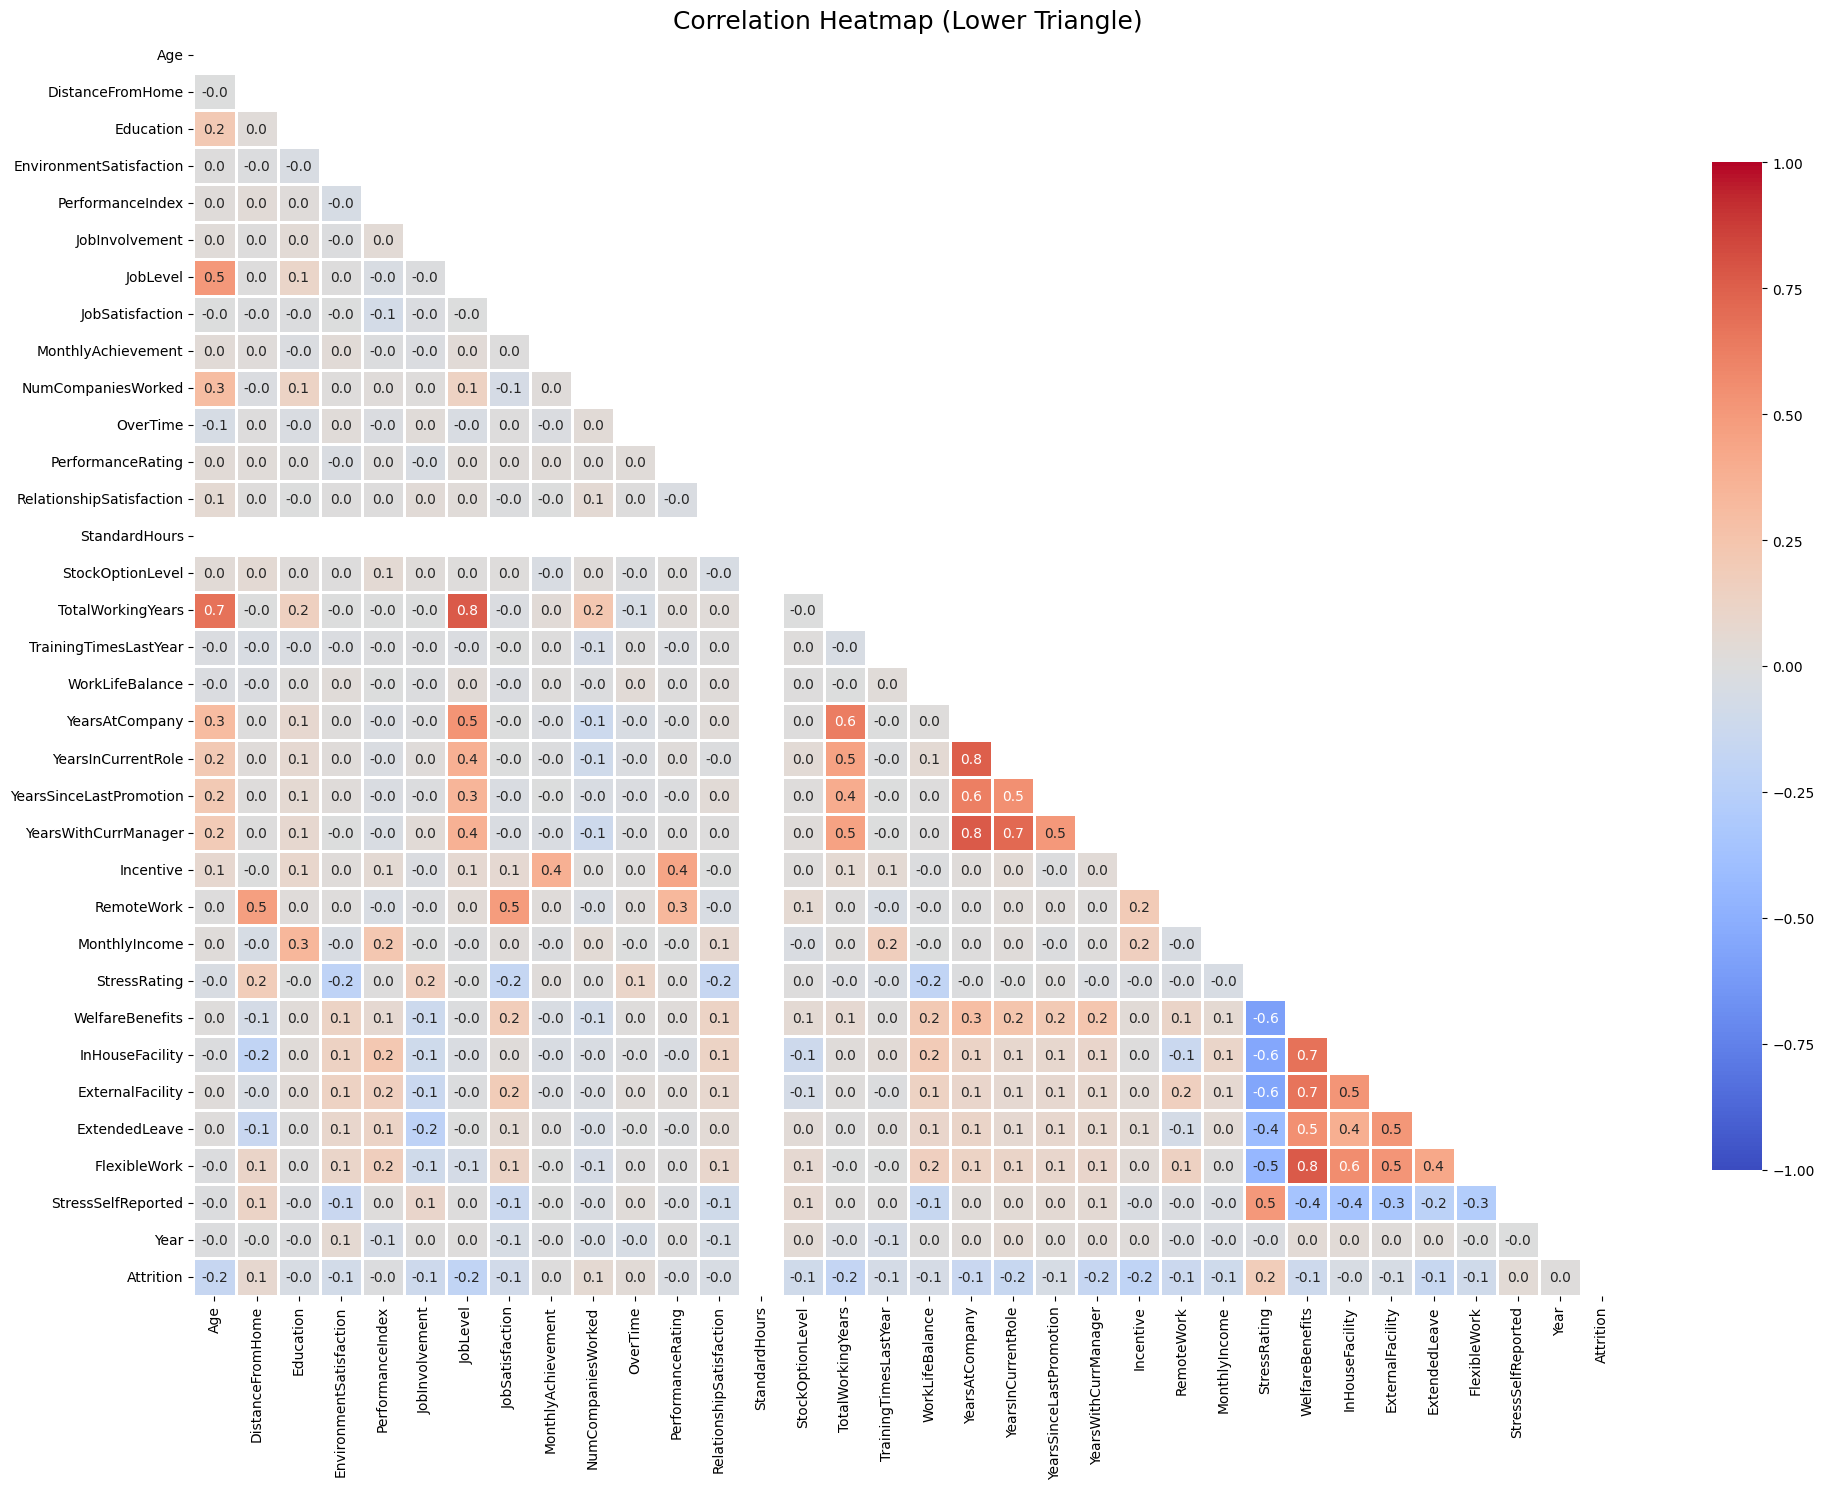

In [19]:

# Data select & Encode Attrition
numeric_df = df.select_dtypes(include=[np.number]).copy()
if 'Attrition' in df.columns:
    numeric_df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# correlation matrix
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    vmax=1, vmin=-1,
    annot=True,
    fmt=".1f",
    linewidths=0.8,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap (Lower Triangle)", fontsize=18)
plt.tight_layout()
plt.show()

**Inference from Multivariate Analysis**

1.  **Multicollinearity Check:** The heatmap reveals moderate correlations (~0.7) among tenure-related features (e.g., `YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager`). However, no pairs exceed the critical threshold of 0.9.
2.  **Strategic Decision:** Since **Tree-based models** (Random Forest, XGBoost) handle collinearity well and these features carry distinct HR implications (e.g., role stagnation vs. company loyalty), **we will retain all features** for the modeling phase.
3.  **Target Correlation:** `MonthlyIncome` and `JobLevel` show expected positive correlations with `TotalWorkingYears`, while `Attrition` (target) generally shows weak linear correlations with individual numerical features, suggesting the need for **non-linear models** to capture complex patterns.

### 2.3. Feature Encoding

In [20]:
# import necessary library
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, roc_auc_score,roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [21]:
df_model = df.copy()
# LABEL ENCODING
df_model['Attrition'] = df_model['Attrition'].map({'Yes': 1, 'No': 0})

df_model['Gender'] = df_model['Gender'].map({'Male': 1, 'Female': 0})
# Ordinal variables
travel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df_model['BusinessTravel'] = df_model['BusinessTravel'].map(travel_map)

# ONE-HOT ENCODING
# Category variables
categorical_cols = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'HowToEmploy']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
df_model = df_model.astype(int)

# Check result
print(f"Size before: {df.shape}")
print(f"After Encoding: {df_model.shape}")
print("-" * 30)
print("New cols created: ")
print(df_model.columns[df_model.columns.str.contains('JobRole')].tolist())

Size before: (1470, 41)
After Encoding: (1470, 58)
------------------------------
New cols created: 
['JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']


In [22]:
# SPLIT DATA
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']
# Train/Test (80% Train - 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (1176, 57), Test shape: (294, 57)


---

## 3. Modeling

We will experiment with two powerful tree-based algorithms, which are highly effective for tabular and non-linear data:
1.  **Random Forest:** for stability and low risk of overfitting
2.  **XGBoost:** An advanced boosting method that often delivers superior performance


### 3.1. Random Forest Classifier
*   Use `class_weight='balanced'` to tackle imbalances
*   Optimizing parameters by `RandomizedSearchCV`.

In [23]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [25]:
best_rf_model = rf_random.best_estimator_
print(f"Best params for random forest model: {rf_random.best_params_}")
print(f"Best AUC score in Train (CV): {rf_random.best_score_:.3f}")

Best params for random forest model: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Best AUC score in Train (CV): 0.808


------------------------------
RESULTS ON THE TEST SET:
ROC-AUC Score: 0.823
------------------------------
Detailed Report:
Accuracy: 0.8707482993197279
Precision: 0.6923076923076923
Recall: 0.375
F1 Score: 0.4864864864864865


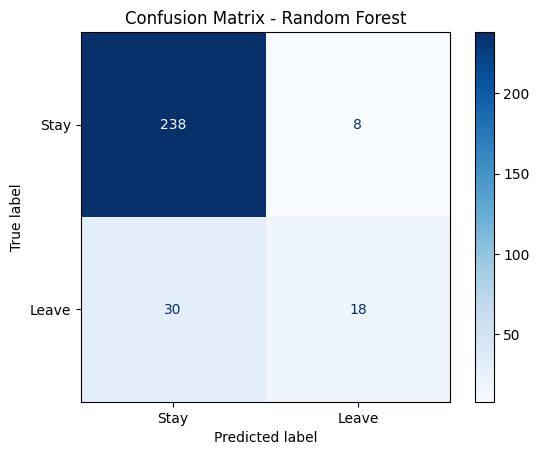

In [26]:
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1] # Extract probability of attrition

# Print evaluation metrics (RANDOM FOREST)
print("-" * 30)
print("RESULTS ON THE TEST SET:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("-" * 30)
print("Detailed Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

ROC-AUC: 0.8233401084010841


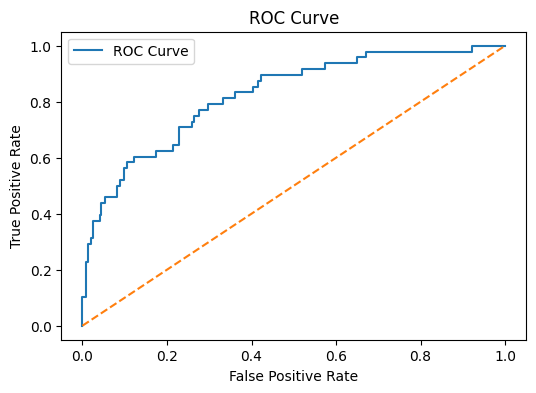

In [27]:
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### 3.2. XGBoost Classifier
*   Use `scale_pos_weight` to increase the weight of the minority class (employees who leave).
*   Optimize parameters (learning_rate, max_depth, etc.) using `RandomizedSearchCV`.


In [29]:
# For feature engineering
count_class_0 = (y_train == 0).sum()
count_class_1 = (y_train == 1).sum()
weight_ratio = count_class_0 / count_class_1

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=weight_ratio,
)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
# RandomizedSearchCV
xgb_random  = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions= xgb_params,
    n_iter=20,
    scoring='roc_auc',
    cv=5,                    # 5 times cross validate
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random .fit(X_train, y_train)
best_xgb = xgb_random .best_estimator_
print("Best Params:", xgb_random .best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}


RESULTS ON THE TEST SET:
ROC-AUC Score: 0.820
------------------------------
Detailed Report:
Accuracy: 0.8367346938775511
Precision: 0.5
Recall: 0.5416666666666666
F1 Score: 0.52


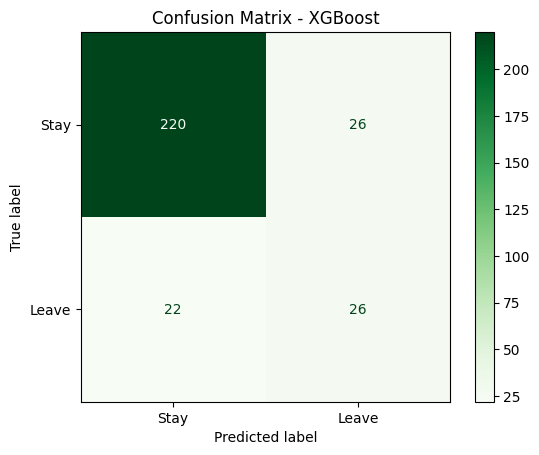

In [31]:
# Prediction on test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Print evaluation metrics (XGBOOST)
print("RESULTS ON THE TEST SET:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.3f}")
print("-" * 30)
print("Detailed Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Stay', 'Leave'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()

ROC-AUC: 0.8202066395663956


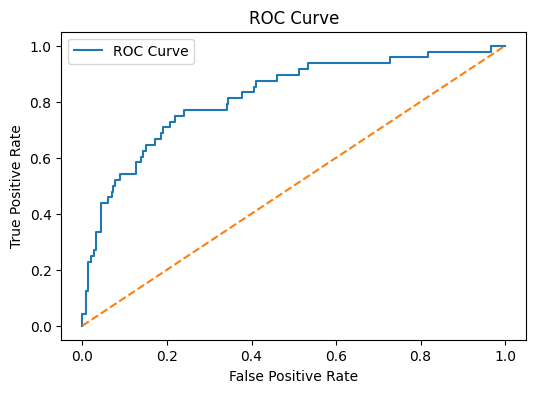

In [32]:
auc = roc_auc_score(y_test, y_pred_proba_xgb)
print("ROC-AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

---

## 4. Evaluation & Comparison
Use classification-specific evaluation metrics:
*   **ROC-AUC:** Measures overall classification capability.
*   **Confusion Matrix:** Shows the number of correct and incorrect predictions for each class.
*   **Recall (for the Leave class):** Assesses the model’s ability to identify employees likely to leave — the most important metric to avoid missing potential risks.


### 4.1. Random Forest result

------------------------------
RESULTS ON THE TEST SET:
ROC-AUC Score: 0.823
------------------------------
Detailed Report:
Accuracy: 0.8707482993197279
Precision: 0.6923076923076923
Recall: 0.375
F1 Score: 0.4864864864864865


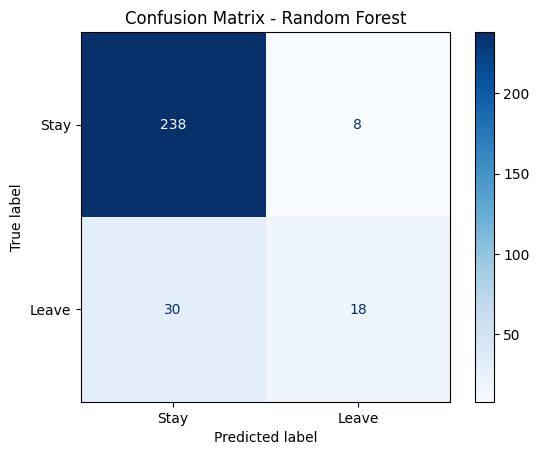

In [35]:
# Print evaluation metrics (RANDOM FOREST)
print("-" * 30)
print("RESULTS ON THE TEST SET:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("-" * 30)
print("Detailed Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 4.2. XGBoost result

RESULTS ON THE TEST SET:
ROC-AUC Score: 0.820
------------------------------
Detailed Report:
Accuracy: 0.8367346938775511
Precision: 0.5
Recall: 0.5416666666666666
F1 Score: 0.52


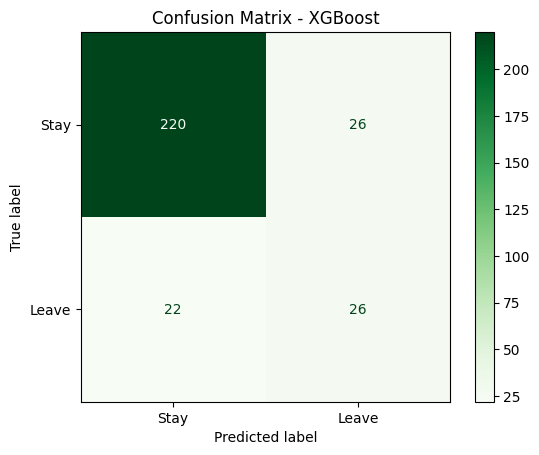

In [36]:
# Print evaluation metrics (XGBOOST)
print("RESULTS ON THE TEST SET:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.3f}")
print("-" * 30)
print("Detailed Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Stay', 'Leave'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()


### 4.3. Comparative Remarks
- ROC-AUC: Both models perform well (>0.8), indicating reliable classification capability. Random Forest is slightly better in overall score.

- Risk detection (Recall): XGBoost clearly outperforms Random Forest (Recall ~54% vs. ~37%). This means XGBoost captures more employees at risk of leaving, even if it results in a slightly higher false-alarm rate.

---

## 5.Model Interpretation
A “black-box” model alone is not sufficient to convince business stakeholders. We need to understand why the model makes certain predictions.


### 5.1. Feature Importance (Tầm quan trọng của các biến)
Dưới đây là các yếu tố tác động mạnh nhất đến quyết định nghỉ việc theo đánh giá của hai mô hình.

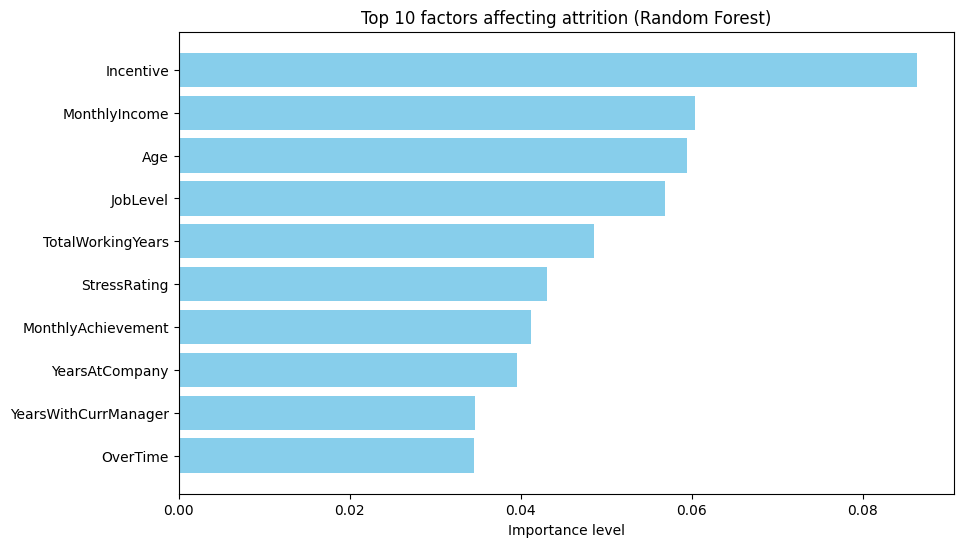

In [37]:
# Extract feature importance (RF)
importances = best_rf_model.feature_importances_
feature_names = X.columns

df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False).head(10) # top 10

plt.figure(figsize=(10, 6))
plt.barh(df_imp['Feature'], df_imp['Importance'], color='skyblue')
plt.xlabel('Importance level')
plt.title('Top 10 factors affecting attrition (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


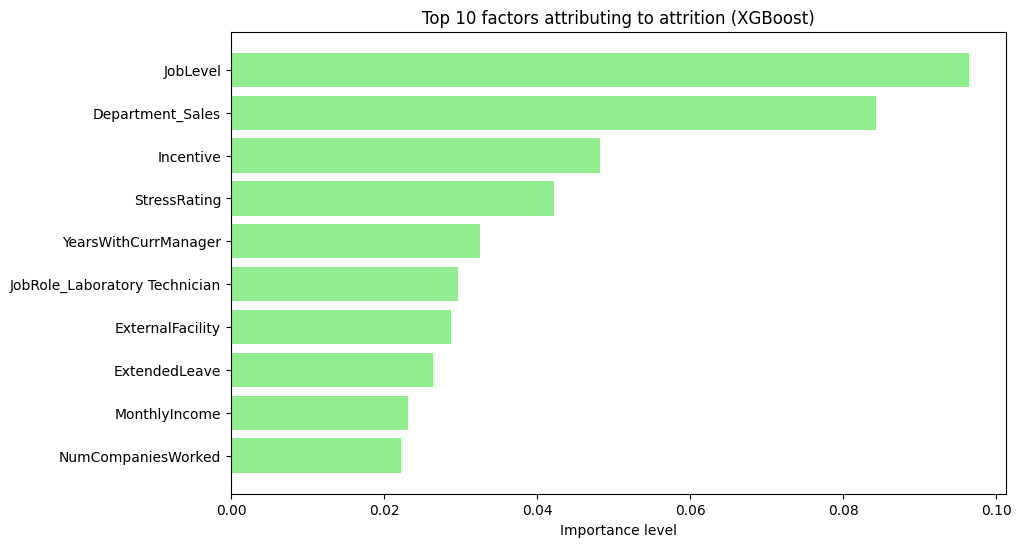

In [38]:
importances_xgb = best_xgb.feature_importances_
feature_names = X.columns

df_imp_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb})
df_imp_xgb = df_imp_xgb.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(df_imp_xgb['Feature'], df_imp_xgb['Importance'], color='lightgreen')
plt.xlabel('Importance level')
plt.title('Top 10 factors attributing to attrition (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

### 5.2. Insights Extracted from the Data
Based on the charts, the top contributing factors include:
1.  **Incentive:** The strongest predictor in both models
2.  **Monthly Income & Job Level:** Compensation and career level play critical roles.
3.  **YearsWithCurrManager:** Relationship with the direct manager strongly affects retention.
4.  **Stress & OverTime:** Workload and job pressure significantly impact attrition risk.

---
## 6. Conclusion & Recommendation
### 6.1. Model Selection
We recommend using **XGBoost** for early detection of employees at risk of leaving, as it provides higher Recall—reducing the chance of overlooking key talent.

### 6.2. Action Plan
Based on model insights, the HR department should consider:
1.  **Reviewing the Incentive Policy:** Ensure rewards are attractive, fair, and timely.
2.  **Developing Clear Career Paths:** Increase transparency in career progression, especially for junior and mid-level employees.
3.  **Strengthening Managerial Capability:**
Provide leadership and communication training for managers to improve employee relations.
4.  **Improving Work Life Balance:** Monitor Stress and Overtime indicators to intervene early and reduce excessive workload.

---